In [1]:
import insigen
import matplotlib.pyplot as plt
import scraper

ins = insigen.insigen()

c:\Users\arcan\Desktop\CodeStuff\PersonalProjects\TopicModelling\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
embeds = ins._load_embeds('Data/embeds.pickle')
embeds.shape

(5668, 768)

In [3]:
def get_similarity(summ, count):
    doc_embed = embeds[count]
    sims = []
    line_embeds = ins._embed_document(summ.split('.'))
    for line_embed in line_embeds:
        similarity = ins._compute_cosine(doc_embed, line_embed)
        sims.append(similarity)
    sims = sum(sims)/len(sims)
    summ_embed = ins._embed_document(summ)
    overall_sim = ins._compute_cosine(doc_embed, summ_embed)
    return sims, overall_sim


In [4]:
import pandas as pd

df = pd.read_csv('Data/wiki.csv')
texts = df['text']
label = df['category_label']
line_contributions = []
overall_sims = []
for count, text in enumerate(texts[:1200]):
    summ = ins.generate_summary(text, topic_match=label[count])
    line_contribution, overall_sim = get_similarity(summ, count)
    line_contributions.append(line_contribution)
    overall_sims.append(overall_sim)

overall_sims

[0.9211845,
 0.9115454,
 0.93783665,
 0.8447629,
 0.8922031,
 0.936691,
 0.73106515,
 0.9132139,
 0.9386923,
 0.8940919,
 0.9605031,
 0.90813357,
 0.88726115,
 0.93366325,
 0.9239856,
 0.885091,
 0.83275026,
 0.8689264,
 0.92146075,
 0.97083575,
 0.93447965,
 0.96873164,
 0.9455695,
 0.9211845,
 0.8852045,
 0.92754257,
 0.9628525,
 0.8027461,
 0.8582761,
 0.94610703,
 0.9449391,
 0.9280132,
 0.8796848,
 0.76680684,
 0.90938437,
 0.9448046,
 0.86293346,
 0.9221308,
 0.937843,
 0.93807226,
 0.9551659,
 0.88642806,
 0.894974,
 0.8999655,
 0.91243815,
 0.90462595,
 0.90174514,
 0.8987124,
 0.8552697,
 0.9299053,
 0.91954166,
 0.87806624,
 0.9684317,
 0.92462116,
 0.94653744,
 0.8866185,
 0.8606306,
 0.9761265,
 0.92429817,
 0.897078,
 0.9281339,
 0.8474613,
 0.90086067,
 0.90197927,
 0.813799,
 0.76616013,
 0.88165677,
 0.8150971,
 0.94576114,
 0.87731874,
 0.9267279,
 0.89058083,
 0.9380945,
 0.8427894,
 0.9090911,
 0.92519754,
 0.9210172,
 0.9364657,
 0.90126973,
 0.91096807,
 0.92602074

In [5]:
with open('overall_sim.txt', 'w') as f:
    f.write(str(overall_sims))

with open('line_contrib.txt', 'w') as f:
    f.write(str(line_contributions))

In [13]:
sum(overall_sims)/len(overall_sims)

0.9213900244732698

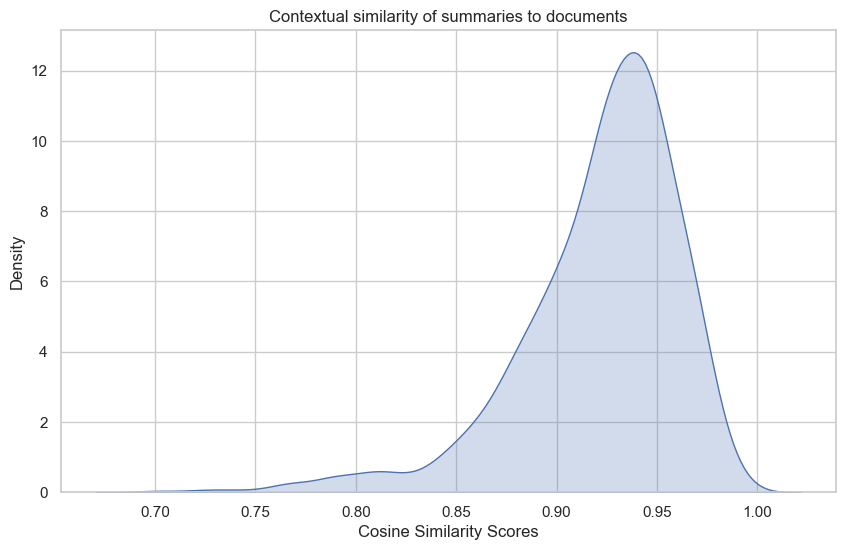

In [25]:
import seaborn as sns
simDf = pd.DataFrame({'Article ID': range(1, 1201), 
                      'Cosine Similarity Scores': overall_sims})
sns.set(style="whitegrid")

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=simDf, x='Cosine Similarity Scores', fill=True)

# Customize labels and title
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Density')
plt.title('Contextual similarity of summaries to documents')

# Show the plot
plt.savefig('EvalResults/overall_sim.png')
plt.show()

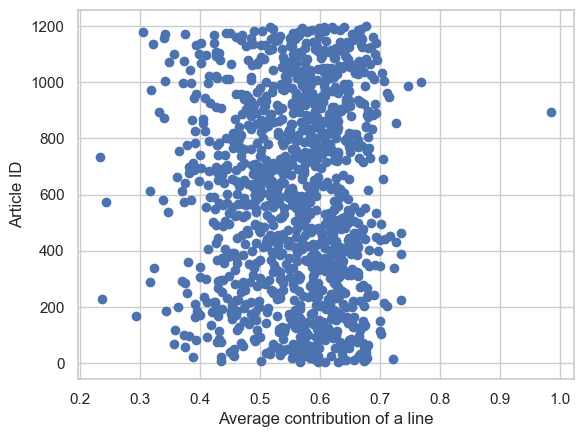

In [26]:
plt.scatter(line_contributions, x)
plt.xlabel('Average contribution of a line')
plt.ylabel('Article ID')
plt.savefig('Average_Line_Contrib.jpg')
plt.show()

In [27]:
sum(line_contributions)/len(line_contributions)

0.5566753607121219